<h3 style="color:#edf1f7;font-size:50px;font-family:'Comic Sans MS';text-align:center;background-color : #47b7ed; border-
radius: 5px 5px;"><strong>Customer Segmentation</strong></h3>

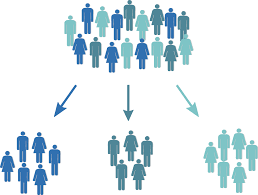

<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Table of Content</strong></h3>

* [1. Importing Libraries](#1)


* [2. Loading Data](#2)


* [3. Renaming Features](#3)


* [4. Meta Information of dataframe](#4)
    
    * [4.1. Shape of Dataframe](#4.1)
    
    * [4.2. DataType of Each Feature](#4.2)
    
    * [4.3. NaN Values](#4.3)        
    

* [5. Dropping unnecessary feature](#5)   


* [6. Statistical description of dataframe](#6)


* [7. Basic EDA](#7)

    * [7.1. Counts of Male and Female](#7.1)
    
    * [7.2. Average age of Male and Female](#7.2) 
    
    * [7.3. Average Income & Spending](#7.3)
        
    * [7.4. Pairplot](#7.4)
    
    * [7.5. Distribution of Age](#7.5)
    
    * [7.6. Distribution of Income](#7.6)
    
    * [7.7. Distribution of Spending](#7.7)


* [8. Creating Seperate DataFrame](#8)


* [9. Customer Age vs Spending](#9)

    * [9.1. Optimal numbers of clusters](#9.1)
    
    * [9.2. Training KMeans Algorithm](#9.2)
    
    * [9.3. Visualizing clusters](#9.3)
    
    

* [10. Customer Icome vs Spending](#10)

    * [10.1 Optimal numbers of clusters](#10.1)
    
    * [10.2. Training KMeans Algorithm](#10.2)
    
    * [10.3. Visualizing clusters](#10.3)
    
    
* [11. Customer Age vs Icome vs Spending](#11)

    * [11.1 Optimal numbers of clusters](#11.1)
    
    * [11.2. Training KMeans Algorithm](#11.2)
    
    * [11.3. Visualizing clusters](#11.3)
    
    
* [12. Conclusion](#12)      

<a id="1"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Importing Libraries</strong></h3>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings, os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

C:\Users\asmaa\.conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<a id="2"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Loading Data</strong></h3>

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id="3"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Renaming Features</strong></h3>

In [3]:
df.rename({'Annual Income (k$)': 'Income',
          'Spending Score (1-100)': 'Spending'}, axis = 1, inplace = True)

<a id="4"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Meta Information of Dataframe</strong></h3>

<a id="4.1"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Shape of dataframe</strong></h3>

In [4]:
print(f'DataFrame has {df.shape[0]} rows and {df.shape[1]} Columns')

DataFrame has 200 rows and 5 Columns


<a id="4.2"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>DataType of Each Feature</strong></h3>

In [5]:
df.dtypes

CustomerID     int64
Gender        object
Age            int64
Income         int64
Spending       int64
dtype: object

<a id="4.3"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>NaN Values</strong></h3>

In [6]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

<a id="5"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Dropping unnecessary feature</strong></h3>

In [7]:
df.drop('CustomerID', axis=1, inplace =True)

<a id="6"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Statistical description of dataframe</strong></h3>

In [8]:
df.describe()

,Age,Income,Spending
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<a id="7"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Basic EDA</strong></h3>

<a id="7.1"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Counts of Male and Female</strong></h3>

In [9]:
df.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

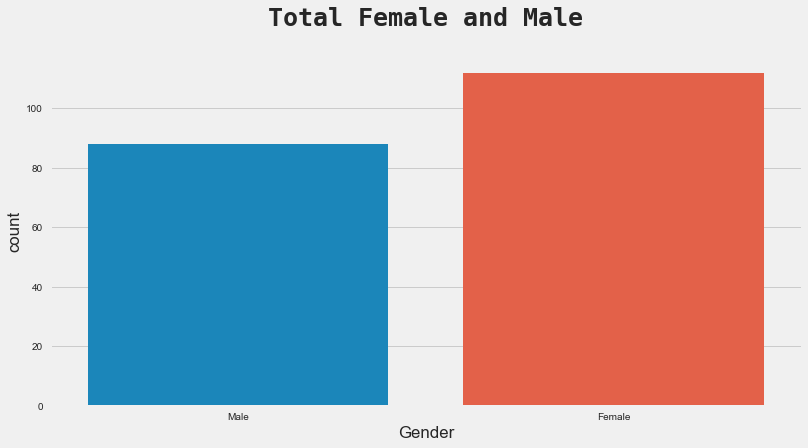

In [10]:
plt.figure(figsize = (12,6))

sns.countplot(data = df, x= 'Gender')

plt.title('Total Female and Male', fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

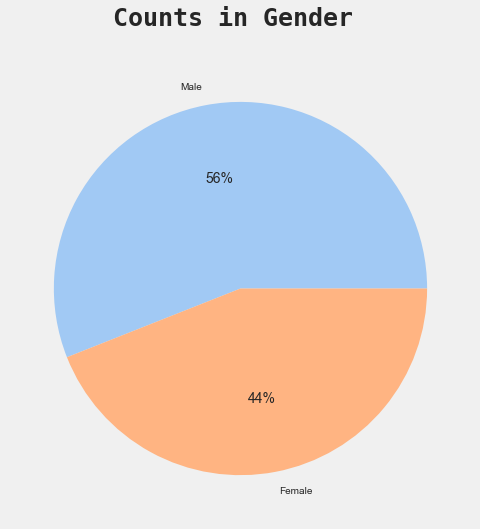

In [11]:
plt.figure(figsize = (12,8))
data = df.groupby('Gender').size()
labels = ['Male','Female']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.title('Counts in Gender ',  fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="7.2"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Average age of Male and Female</strong></h3>

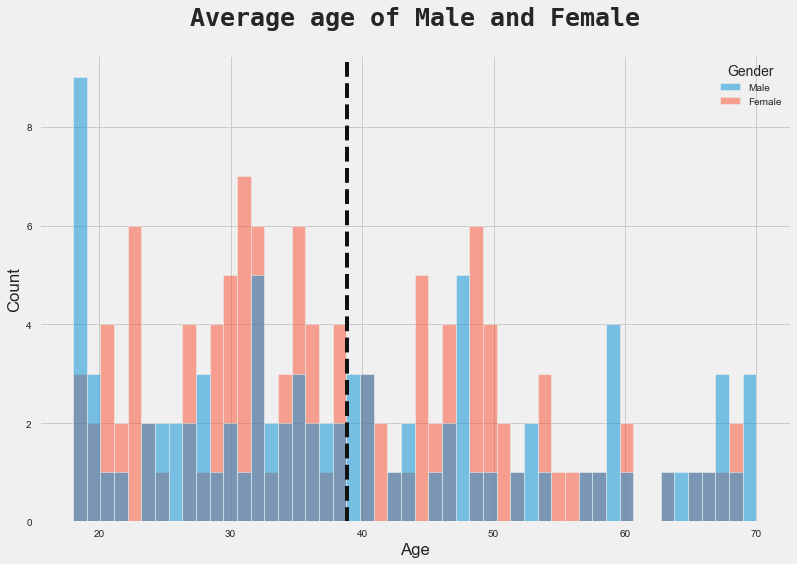

In [12]:
plt.figure(figsize= (12,8))
sns.histplot(data = df, x = 'Age',hue= 'Gender', bins= 50)

# draw mean distance line in the histogram plot
mean = df.Age.mean()
plt.axvline(x = mean, linestyle = '--', label = 'Mean Age', color = 'k')

plt.title('Average age of Male and Female',  fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="7.3"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Average Income & Spending</strong></h3>

In [13]:
df.groupby('Gender').agg({'Income': 'mean', 'Spending': 'mean'}).style.background_gradient()

,Income,Spending
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


<a id="7.4"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Pairplot</strong></h3>

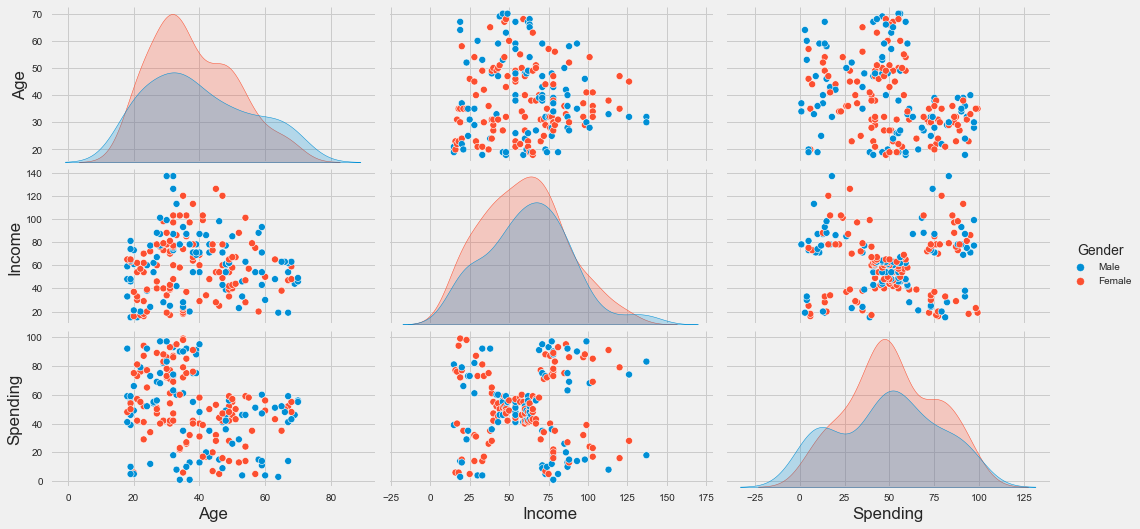

In [14]:
sns.pairplot(df, hue ='Gender', aspect=2);

<a id="7.5"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Distribution of Age</strong></h3>

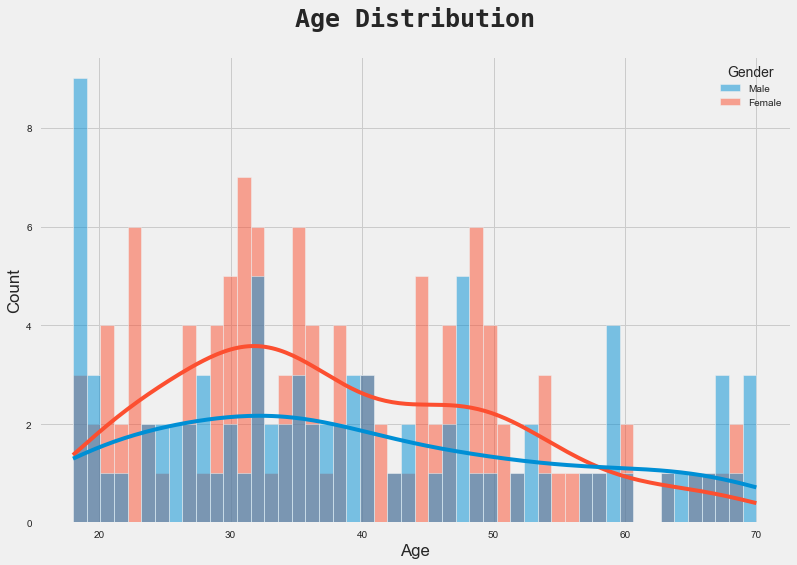

In [15]:
plt.figure(figsize= (12,8))

sns.histplot(data = df, x = 'Age',hue = 'Gender',kde= True ,bins= 50)

plt.title('Age Distribution',  fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

> * Majority of customers are in age group 20-30 & 30-40.
> * Female Gender is more than the male

<a id="7.6"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Distribution of Income</strong></h3>

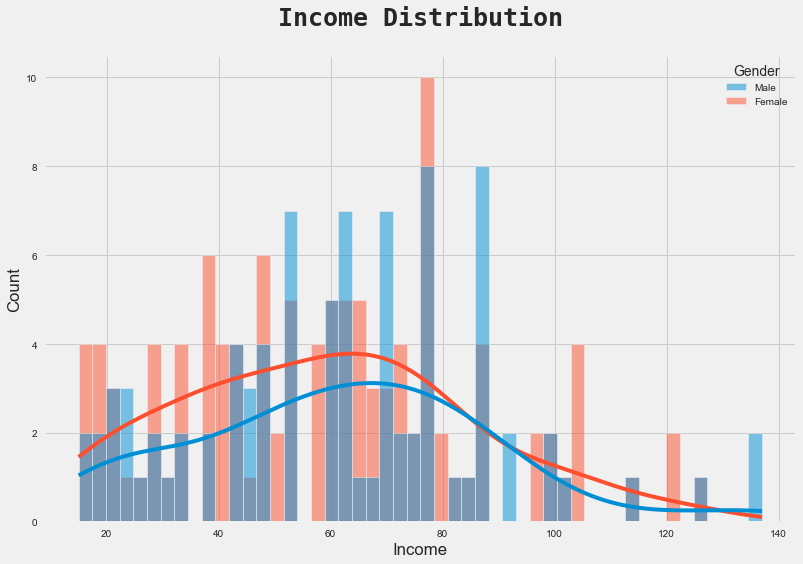

In [16]:
plt.figure(figsize= (12,8))

sns.histplot(data = df, x = 'Income',hue = 'Gender',kde= True ,bins= 50)

plt.title('Income Distribution',  fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

> * Few customers earn more than 100k and most of them are female.
> * Majority of customers have income between range 40-80k.

<a id="7.7"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Distribution of Spending</strong></h3>

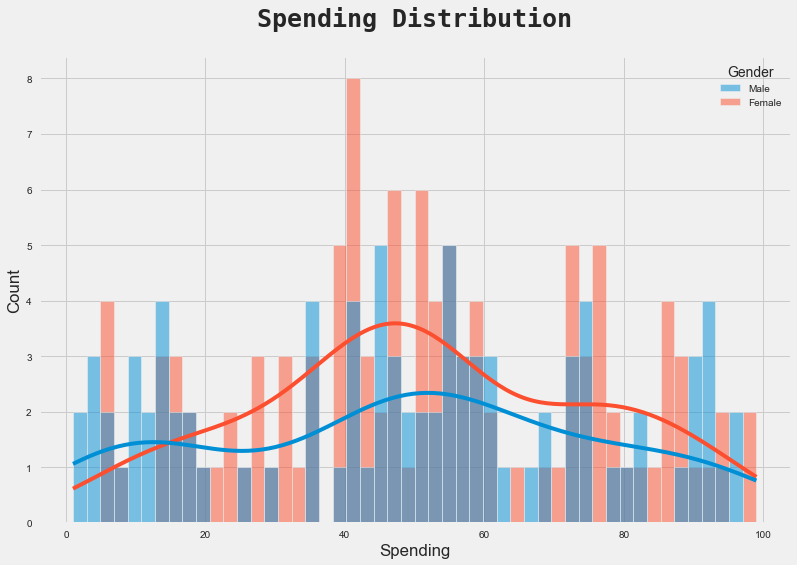

In [17]:
plt.figure(figsize= (12,8))

sns.histplot(data = df, x = 'Spending',hue = 'Gender',kde= True ,bins= 50)

plt.title('Spending Distribution',  fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="8"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Creating Seperate DataFrame</strong></h3>

In [18]:
age_spending_df = df[['Age', 'Spending']]
income_spending_df = df[['Income', 'Spending']]
age_income_spending = df[['Age','Income', 'Spending']]

<a id="9"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Customer Age vs Spending</strong></h3>

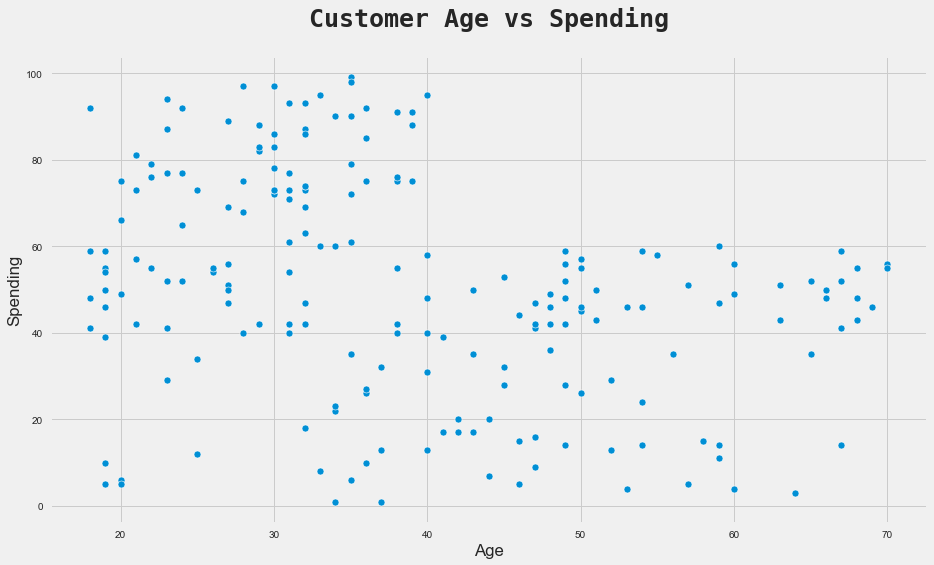

In [19]:
plt.figure(figsize= (14,8))
sns.scatterplot(data = age_spending_df, x = 'Age', y ='Spending')
plt.title('Customer Age vs Spending' ,fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="9.1"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Identifying Optimal numbers of clusters</strong></h3>

In [20]:
inertia = []

for i in range(1,11):
    model = KMeans(n_clusters = i, max_iter=300, tol=0.0001, random_state=42)
    model.fit(age_spending_df)
    inertia.append(model.inertia_)

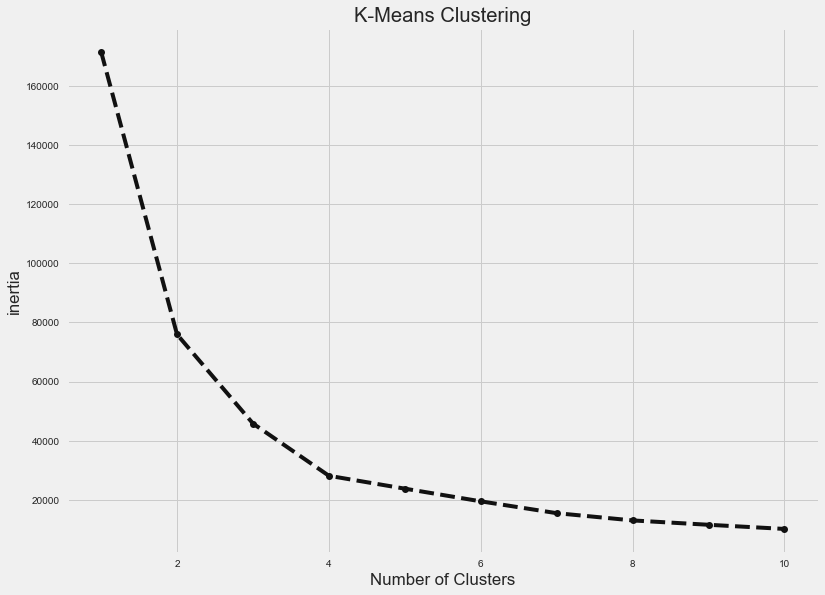

In [21]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),inertia, marker = 'o', linestyle = '--', color = 'k')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('K-Means Clustering')
plt.show()

### `4` is the optimal number of clusters for age and income dataframe 

<a id="9.2"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Training KMeans Algorithm</strong></h3>

In [22]:
model = KMeans(n_clusters = 4)
model.fit(age_spending_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
age_spending_df['labels'] = model.labels_

In [24]:
age_spending_analysis = age_spending_df.groupby('labels').mean()
age_spending_analysis['obs_no'] = age_spending_df[['Age', 'labels']].groupby(['labels']).count()
age_spending_analysis['obs_prop'] = age_spending_analysis['obs_no'] / age_spending_analysis['obs_no'].sum()
age_spending_analysis

,Age,Spending,obs_no,obs_prop
labels,,,,
0,27.617021,49.148936,47,0.235
1,30.175439,82.350877,57,0.285
2,43.291667,15.020833,48,0.240
3,55.708333,48.229167,48,0.240


<a id="9.3"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;">Visualizing clusters<strong></strong></h3>

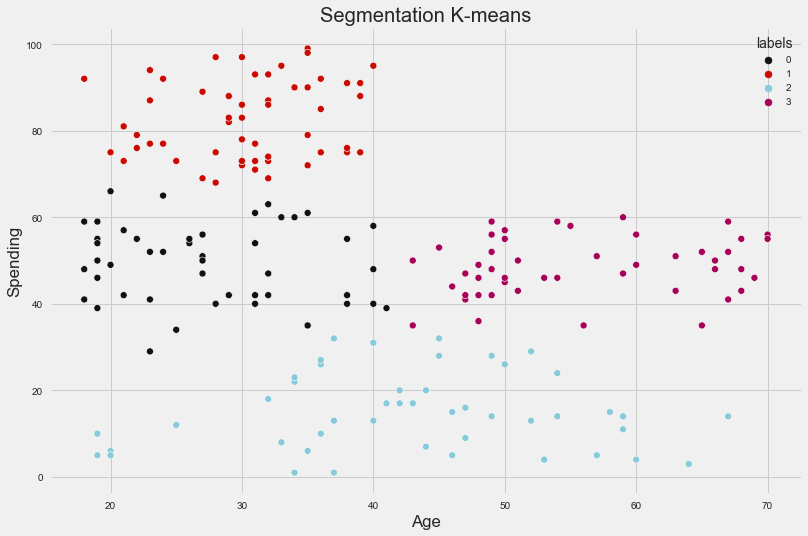

In [25]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = age_spending_df['Age'], y = age_spending_df['Spending'], hue = age_spending_df['labels'],
                palette = ['k', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

<a id="10"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Customer Income vs Spending</strong></h3>

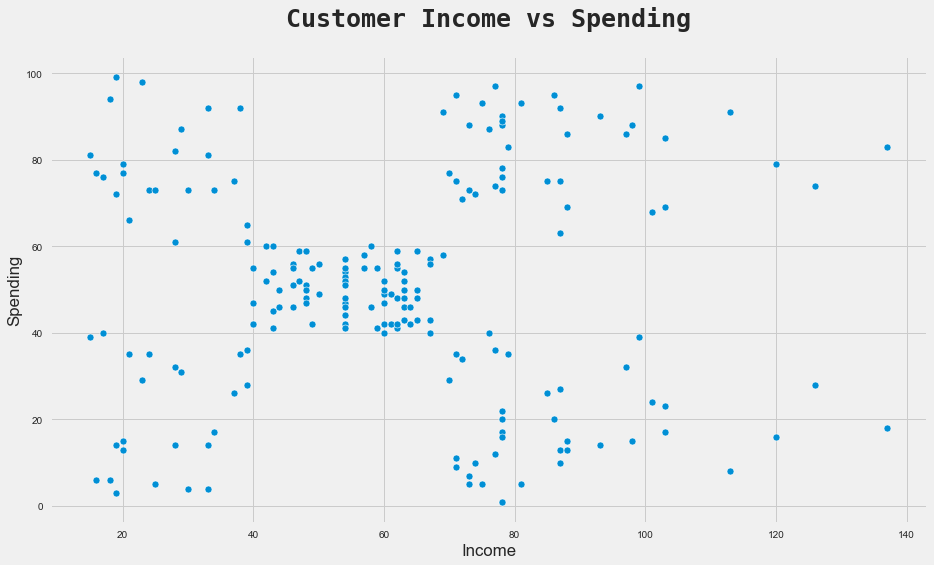

In [26]:
plt.figure(figsize= (14,8))
sns.scatterplot(data = income_spending_df, x = 'Income', y ='Spending')
plt.title('Customer Income vs Spending' ,fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="10.1"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Identifying Optimal numbers of clusters</strong></h3>

In [27]:
inertia = []

for i in range(1,11):
    model = KMeans(n_clusters = i, max_iter=300, tol=0.0001, random_state=42)
    model.fit(income_spending_df)
    inertia.append(model.inertia_)

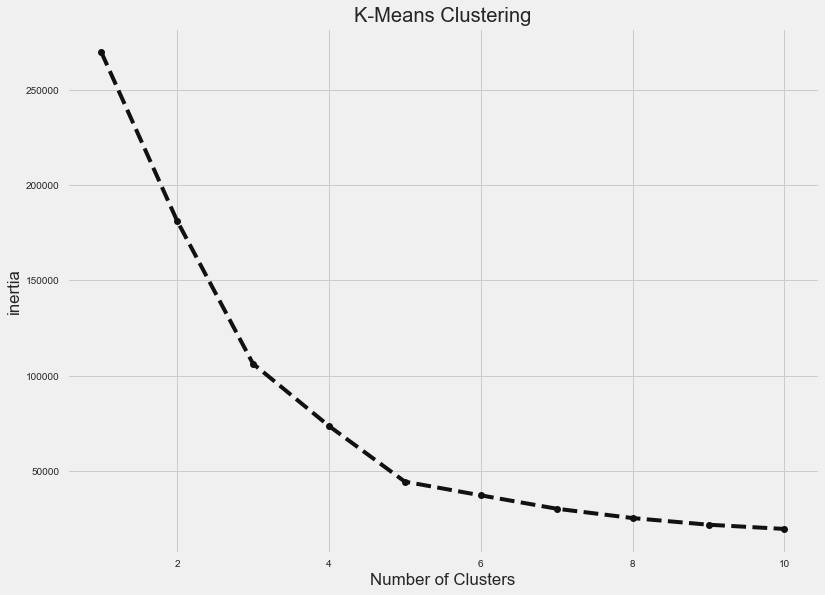

In [28]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),inertia, marker = 'o', linestyle = '--', color = 'k')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('K-Means Clustering')
plt.show()

### `5` is the optimal number of clusters for age and income dataframe 

<a id="10.2"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Training KMeans Algorithm</strong></h3>

In [29]:
model = KMeans(n_clusters = 5)
model.fit(income_spending_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
income_spending_df['labels'] = model.labels_

In [31]:
income_spending_analysis = income_spending_df.groupby('labels').mean()
income_spending_analysis['obs_no'] = income_spending_df[['Income', 'labels']].groupby('labels').count()
income_spending_analysis['obs_prop'] = income_spending_analysis['obs_no'] / income_spending_analysis['obs_no'].sum()
income_spending_analysis

,Income,Spending,obs_no,obs_prop
labels,,,,
0,25.727273,79.363636,22,0.110
1,55.296296,49.518519,81,0.405
2,86.538462,82.128205,39,0.195
3,88.200000,17.114286,35,0.175
4,26.304348,20.913043,23,0.115


<a id="10.3"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;">Visualizing clusters<strong></strong></h3>

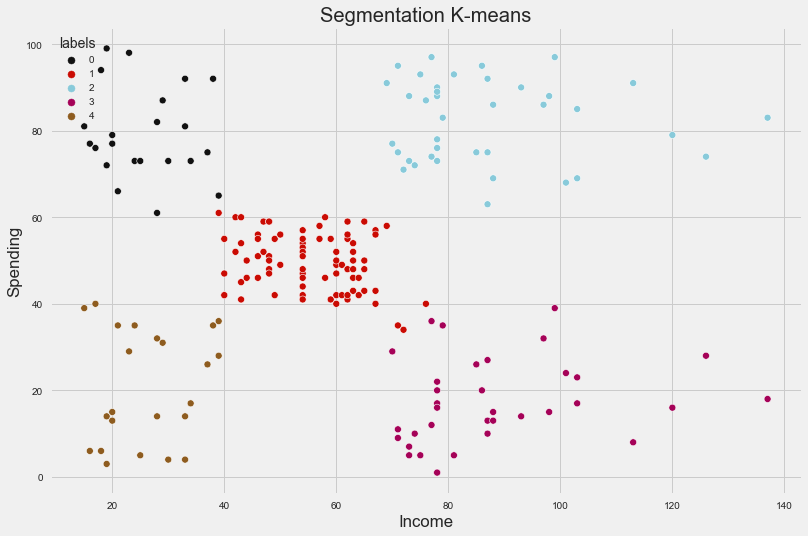

In [32]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = income_spending_df['Income'], y = income_spending_df['Spending'], hue = income_spending_df['labels'],
                palette = ['k', 'r', 'c', 'm', '#8E5C1F'])
plt.title('Segmentation K-means')
plt.show()

<a id="11"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Customer Age vs Income vs Spending</strong></h3>

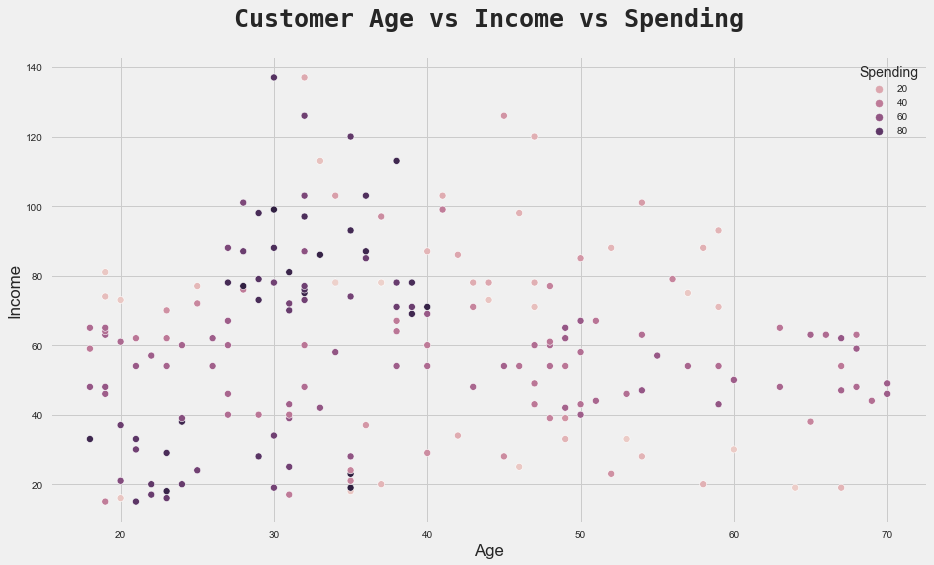

In [33]:
plt.figure(figsize= (14,8))
sns.scatterplot(data = age_income_spending, x = 'Age', y ='Income', hue= 'Spending')
plt.title('Customer Age vs Income vs Spending' ,fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)
plt.show()

<a id="11.1"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Identifying Optimal numbers of clusters</strong></h3>

In [34]:
inertia = []

for i in range(1,11):
    model = KMeans(n_clusters = i, max_iter=300, tol=0.0001, random_state=42)
    model.fit(age_income_spending)
    inertia.append(model.inertia_)

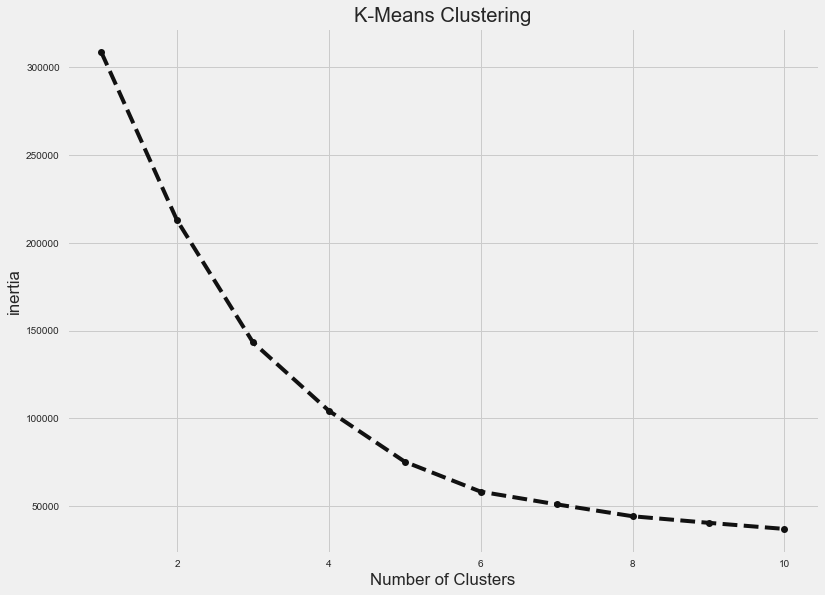

In [35]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),inertia, marker = 'o', linestyle = '--', color = 'k')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('K-Means Clustering')
plt.show()

### `5` is the optimal number of clusters for age and income dataframe 

<a id="11.2"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;"><strong>Training KMeans Algorithm</strong></h3>

In [36]:
model = KMeans(n_clusters = 5)
model.fit(age_income_spending)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
age_income_spending['labels'] = model.labels_

In [38]:
age_income_spending_analysis = age_income_spending.groupby('labels').mean()
age_income_spending_analysis['obs_no'] = age_income_spending[['Income', 'labels']].groupby('labels').count()
age_income_spending_analysis['obs_prop'] = age_income_spending_analysis['obs_no'] / age_income_spending_analysis['obs_no'].sum()
age_income_spending_analysis

,Age,Income,Spending,obs_no,obs_prop
labels,,,,,
0,43.282051,55.025641,49.692308,78,0.390
1,40.324324,87.432432,18.189189,37,0.185
2,25.521739,26.304348,78.565217,23,0.115
3,32.692308,86.538462,82.128205,39,0.195
4,45.217391,26.304348,20.913043,23,0.115


> * `Type 0` : Cusotmer has **Low Income & Low Spending**.

> * `Type 1` : Cusotmer has **High Income & Low Spending**.

> * `Type 2` : Cusotmer has **High Income & High Spending**.

> * `Type 3` : Cusotmer has **Low Income & High Spending**.

> * `Type 4` : Cusotmer has **Median Income & Median Spending**.

<a id="11.3"></a>
<h3 style="color:#47b7ed;font-size:35px;font-family:newtimeroman;text-align:center;">Visualizing clusters<strong></strong></h3>

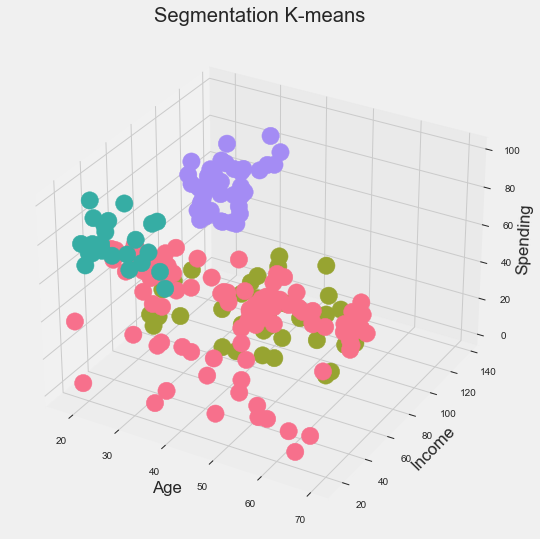

In [39]:
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

#put the 3d dim
x = age_income_spending['Age']
y = age_income_spending['Income']
z = age_income_spending['Spending']
hue = age_income_spending['labels']
# plotting the 3d scatter
fig = ax.scatter(x,y,z,c=hue,s=300,cmap=cmap, marker='o', alpha=1)
# putting the title and labels
plt.title('Segmentation K-means')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
plt.show()

<a id="12"></a>
<h3 style="color:#47b7ed;font-size:44px;font-family:newtimeroman;text-align:center;"><strong>Conclusion</strong></h3>

* `Type 0`: Low Income & Low Spending (Low-value customers: consumption potential, They are 11% of the customers, this part of the user we only need to invest a small amount of resources, appropriate push cheap products)


* `Type 1`: High Income & Low Spending (Important retention of customers: This part of the customer consumption potential is similar to the important value user, They are 18% of the customers)  we should actively communicate with customers, improve the user's repurchase rate, while conducting research on this part of the user, improve the shopping experience of such users.


* `Type 2`: High Income & High Spending (Important value users, and they are 19% of the customers), this user group is worth investing a lot of resources to maintain, we can provide VIP services to this part of the custome.


* `Type 3`: Low Income & High Spending (Promotion of sensitive customers: low consumption potential, relatively small number of people, the third largest total consumption, should push more preferential information, as well as combined preferential information) they are 11% of the customers


* `Type 4`: Median Income & Median Spending (Main User: Medium consumption potential, the largest number of people, the largest total consumption, is the pillar of the company's income), They are 39% of the customers.